In [1]:
# Full name: Mai Xuan Bach
# ID: 11200489

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

# 1.	
Implement K-means algorithm by Numpy.

In [5]:
class KMeans():
    
    def __init__(self, k, max_iterations = 20):
        # k: number of cluster
        # max_iterations: default = 20
        self._k = k
        self._max_iterations = max_iterations
    
    def fit(self, X, visualize = False):
        # X: Input X
        self._X = X
        self._no_samples, self._no_features = X.shape # N, d
        
        # Randomly initialize centroids:
        #  np.random.choice(...): lấy ra k dòng bất kì trong các dòng của X, replace = False vì STT dòng không thể trùng 
        centroids = self._X[np.random.choice(self._no_samples, self._k, replace = False), :]
        
        # Iterations:
        for i in range(self._max_iterations):
            # Find r (Assign labels)
            #  Calculate the pairwise distance between datapoint
            distances = np.array([np.linalg.norm(X - centroids[j], axis = 1) for j in range(self._k)])
            
            #  Assign data to the cluster whose distance is minimum
            labels = np.argmin(distances, axis = 0)
            
            # Calculate inertia
            inertia = np.sum([np.sum((self._X[labels == j] - centroids[j])**2) for j in range(self._k)])
            
            # Re-calculate centroids
            centroid_old = np.copy(centroids)
            for j in range(self._k):
                centroids[j] = np.mean(self._X[labels == j], axis = 0)
                
                
            # Terminate the loop if the centroids remains (converges)
            if np.all(centroid_old == centroids):
                break
            
            
            # Visualization
            if visualize == True:
                colors = ['r', 'g', 'b', 'y', 'c', 'm']
                for j in range(self._no_samples):
                    # Visualize each datapoint with color by cluster
                    plt.scatter(self._X[j, 0], self._X[j, 1], color = colors[labels[j]])
                #  Visualize centroids
                plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 200, linewidths = 3, color = 'k')
                plt.title("Iteration {}".format(i + 1))
                plt.pause(1)
            
        self._labels = labels
        self._centroids = centroids
        self._inertia = inertia
        
        return self
    
    def get_centroids(self):
        return self._centroids
    
    def get_labels(self):
        return self._labels
    
    def get_inertia(self):
        return self._inertia

# 2.	
Create at least three toy dataset (https://scikit-learn.org/stable/datasets/sample_generators.html), then apply kmean algorithm built in the first question? Try different number of cluster to see how the result change?

## First dataset

In [6]:
from sklearn.datasets import make_blobs

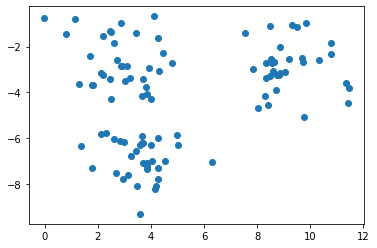

In [7]:
# Tạo dữ liệu ngẫu nhiên
X, y = make_blobs(n_samples=100, centers=3, random_state=30)
plt.scatter(X[:, 0], X[:, 1])

### k = 3

In [8]:
kmean3 = KMeans(3, max_iterations = 10)

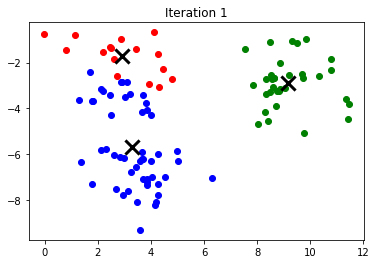

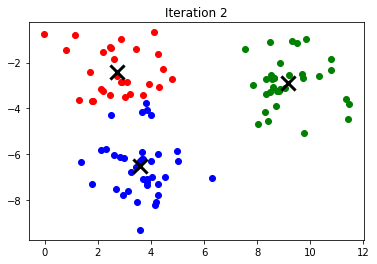

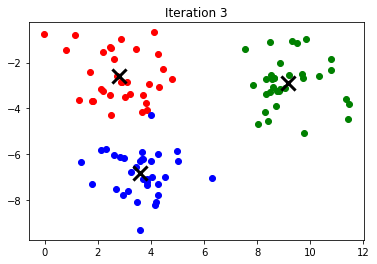

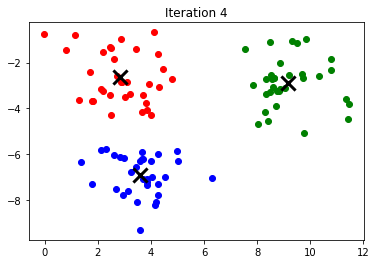

In [9]:
kmean3.fit(X, visualize = True)

### k = 2

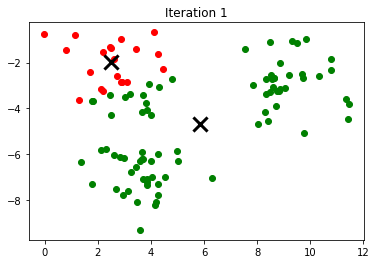

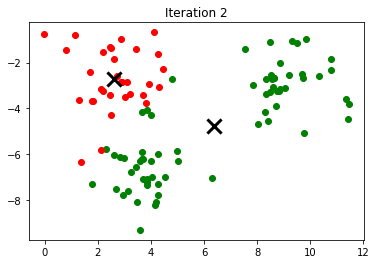

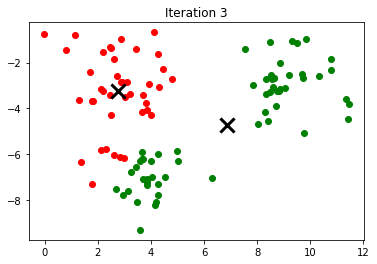

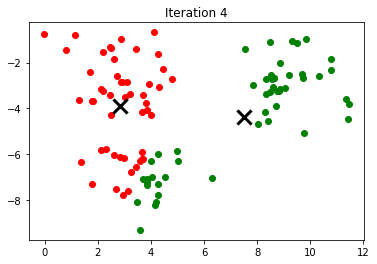

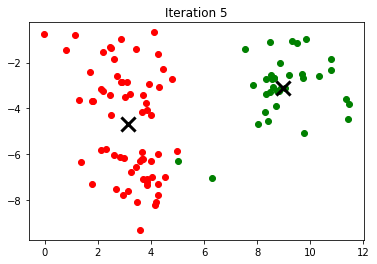

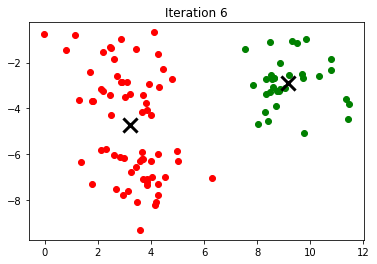

In [10]:
kmean2 = KMeans(2, max_iterations = 10)
kmean2.fit(X, visualize=True)

### k = 4

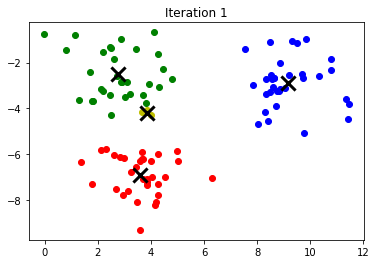

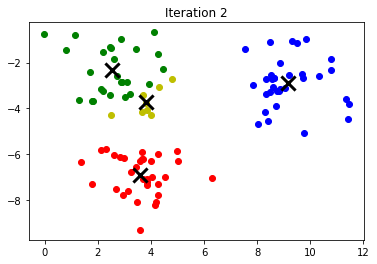

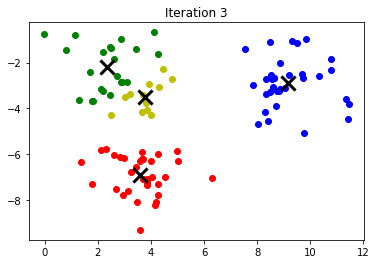

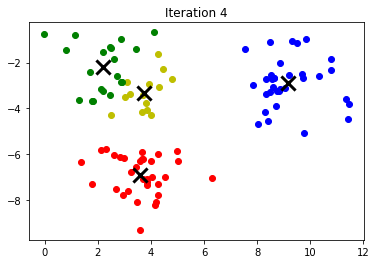

In [11]:
kmean4 = KMeans(4, max_iterations = 10)
kmean4.fit(X, visualize=True)

### k = 5

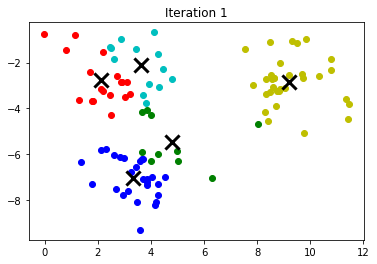

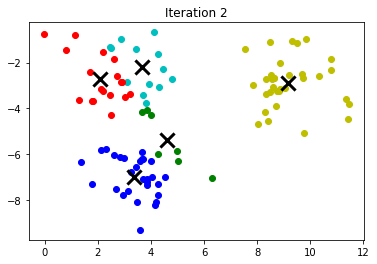

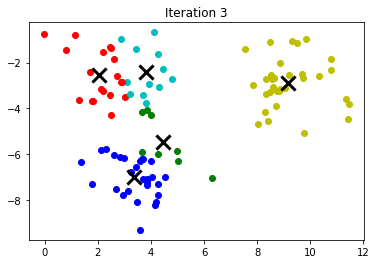

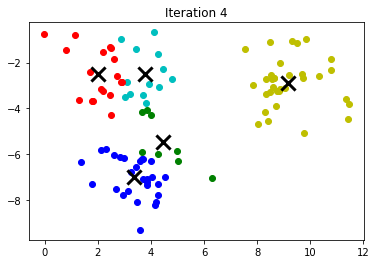

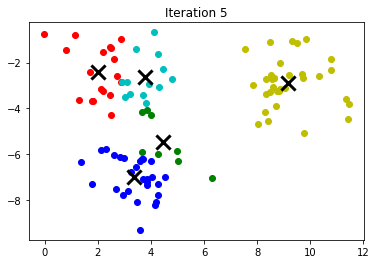

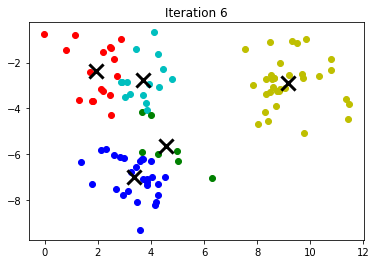

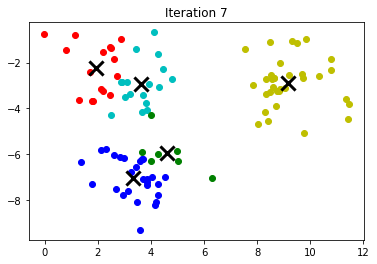

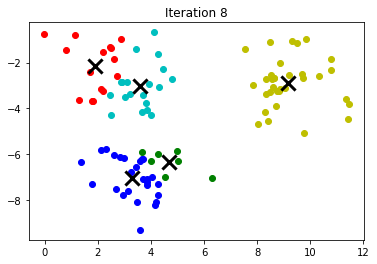

In [12]:
kmean5 = KMeans(5, max_iterations = 10)
kmean5.fit(X, visualize=True)

**Comments**:

## 2nd dataset

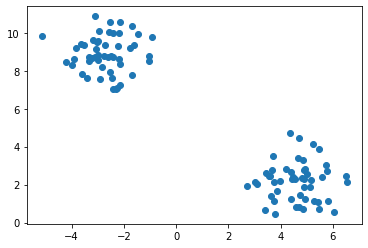

In [13]:
# Tạo dữ liệu ngẫu nhiên
X_dataset_2, y = make_blobs(n_samples=100, centers=2, random_state=42)
plt.scatter(X_dataset_2[:, 0], X_dataset_2[:, 1])

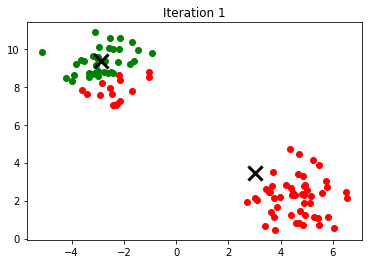

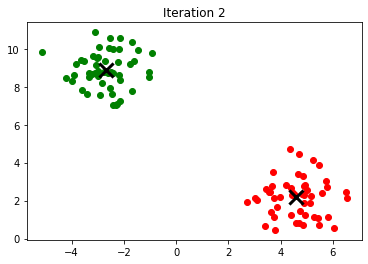

In [14]:
kmean_dataset_2 = KMeans(2, max_iterations = 10)
kmean_dataset_2.fit(X_dataset_2, visualize=True)

## 3rd dataset

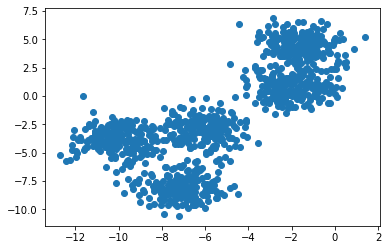

In [15]:
# Tạo dữ liệu ngẫu nhiên
X_dataset_3, y = make_blobs(n_samples=1000, centers=5, random_state=1)
plt.scatter(X_dataset_3[:, 0], X_dataset_3[:, 1])

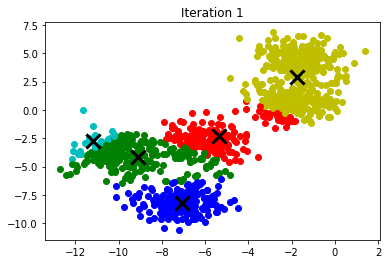

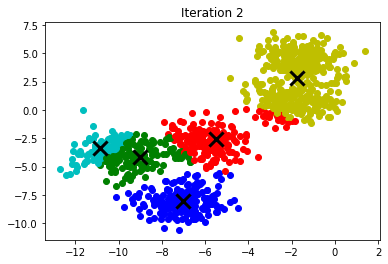

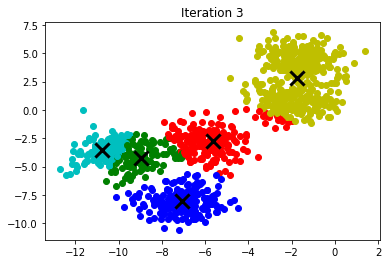

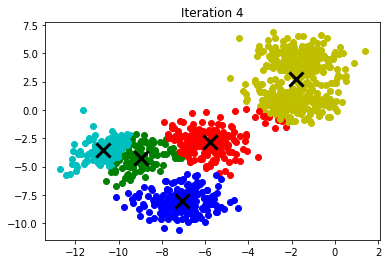

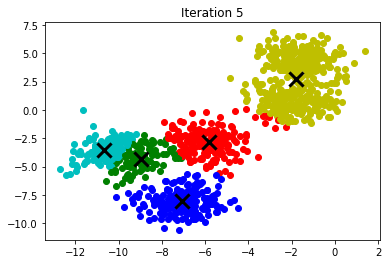

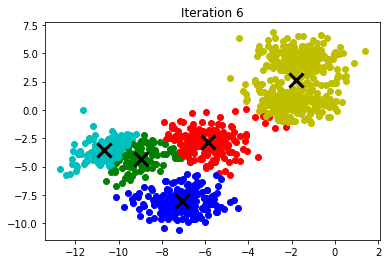

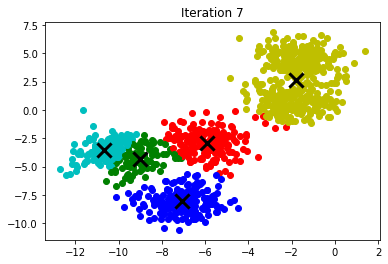

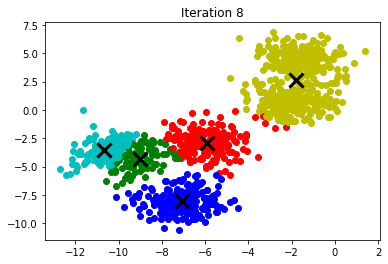

In [16]:
kmean_dataset_3 = KMeans(5, max_iterations = 10)
kmean_dataset_3.fit(X_dataset_3, visualize=True)

# 3.	
Read and understand how to choose k (https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/), draw the elbow for the above dataset.

- **Elbow Curve Method** (as below): find the point where the average distance from the centroid falls suddenly (“Elbow”).
- **Silhouette analysis**: A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters (the higher the better)

1381.9155558736825 

519.0729620180487 

207.31489815356903 

187.4978590894902 

169.96046271380052 

130.3069777881056 

108.26800096809148 

105.87973361656063 

136.33979586445125 



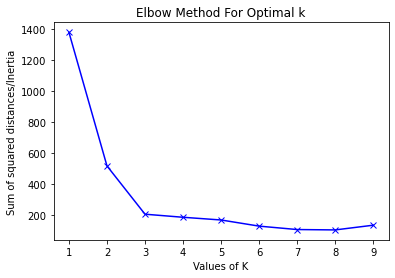

In [17]:
def draw_elbow_kmeans(X):
    Sum_of_squared_distances = []
    K = range(1, 10)
    for num_clusters in K:
        kmeans = KMeans(k = num_clusters)
        kmeans.fit(X)
        print(kmeans.get_inertia(), "\n")
        Sum_of_squared_distances.append(kmeans.get_inertia())
        
    plt.plot(K,Sum_of_squared_distances,"bx-")
    plt.xlabel("Values of K") 
    plt.ylabel("Sum of squared distances/Inertia") 
    plt.title("Elbow Method For Optimal k")
    plt.show()
draw_elbow_kmeans(X)

# 4.	
Read the limitation of kmean (https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages), find at least three example k-mean doesn't work.

**Advantages**:
- Relatively simple to implement.
- Scales to large data sets.
- Guarantees convergence.
- Can warm-start the positions of centroids.
- Easily adapts to new examples.
- Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

**Disadvantages**:
- Choosing  manually.
- Being dependent on initial values.
- Clustering data of varying sizes and density.
- Clustering outliers.
- Scaling with number of dimensions.

**Examples k-means doesn't work**

## Eg1: 
**Not linearly separable, not globular shape**

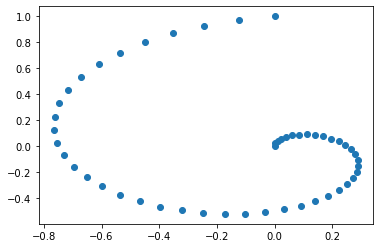

In [18]:
n_samples = 50

theta = np.linspace(0, 2*np.pi, n_samples)
r = np.linspace(0, 1, n_samples)

X_test_1 = np.zeros((n_samples, 2))
X_test_1[:, 0] = r * np.sin(theta)
X_test_1[:, 1] = r * np.cos(theta)

plt.scatter(X_test_1[:, 0], X_test_1[:, 1])
plt.show()

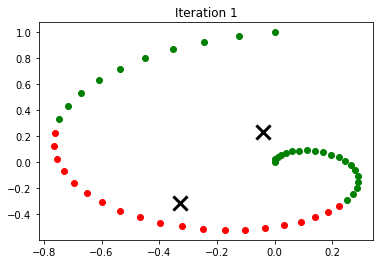

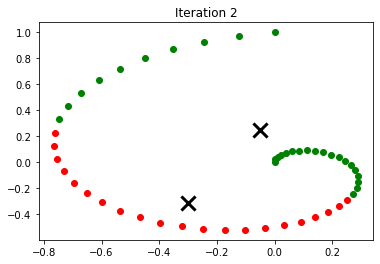

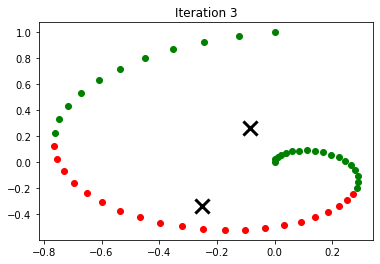

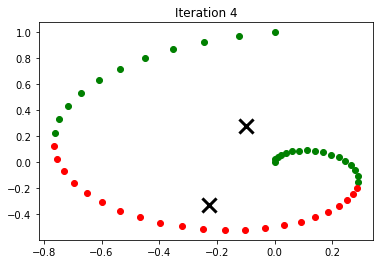

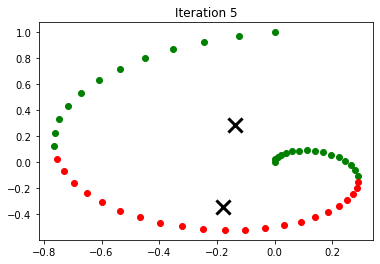

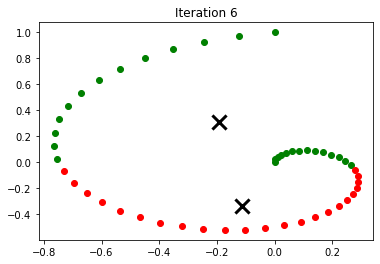

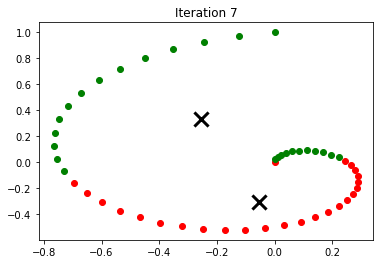

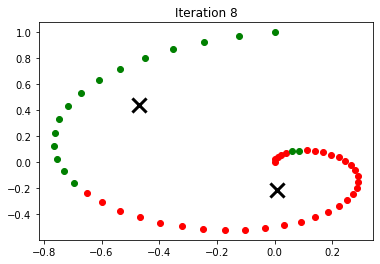

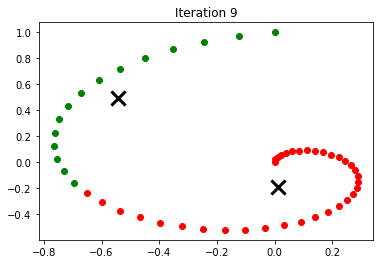

In [19]:
kmean_test_1 = KMeans(2, max_iterations = 10)
kmean_test_1.fit(X_test_1, visualize=True)

## Eg2: 
**Not linearly separable, not globular shape**

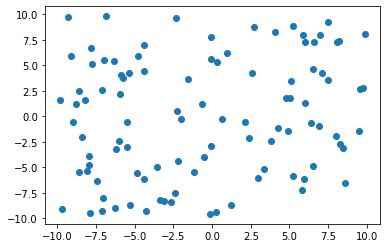

In [20]:
n_samples = 100
X_test_2 = np.random.uniform(low=-10, high=10, size=(n_samples, 2))
plt.scatter(X_test_2[:, 0], X_test_2[:, 1])
plt.show()

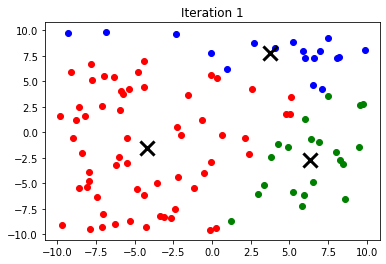

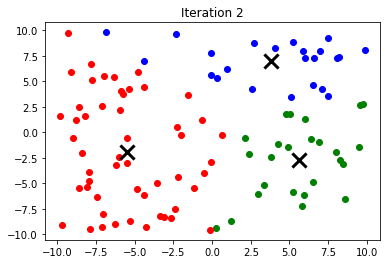

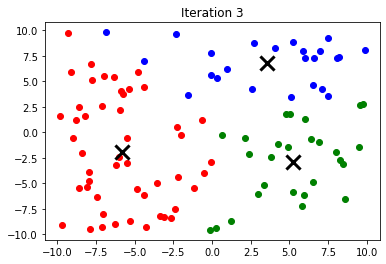

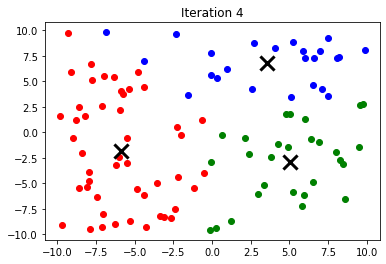

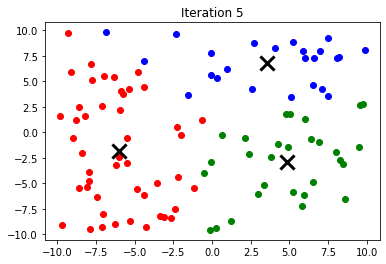

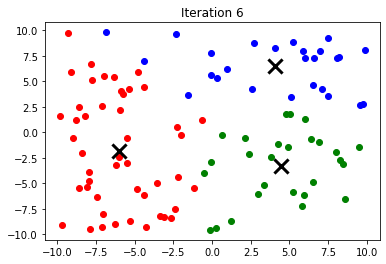

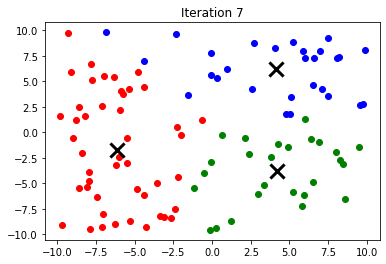

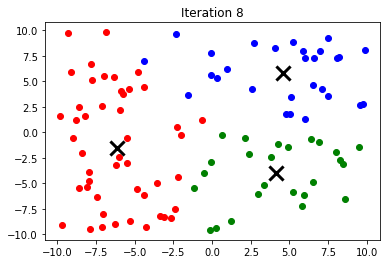

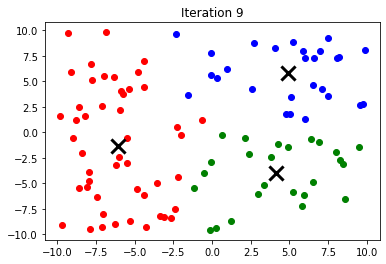

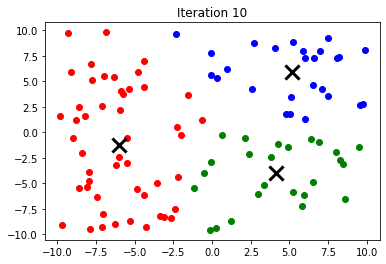

In [21]:
kmean_test_2 = KMeans(3, max_iterations = 10)
kmean_test_2.fit(X_test_2, visualize=True)

## Eg3: 
**Not linearly separable**

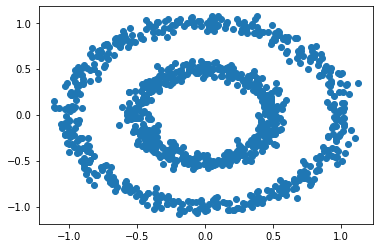

In [22]:
from sklearn.datasets import make_circles
X_test_3, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)

plt.scatter(X_test_3[:, 0], X_test_3[:, 1])
plt.show()

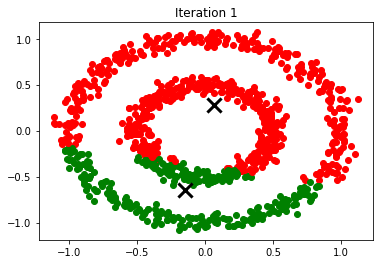

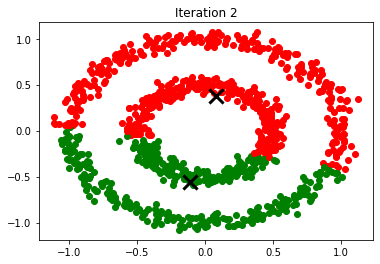

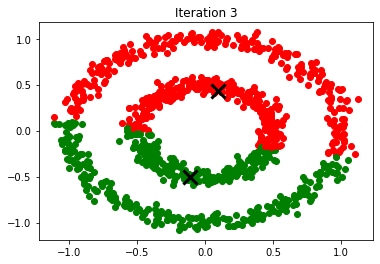

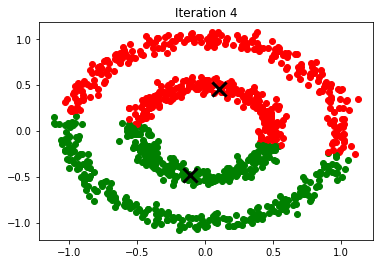

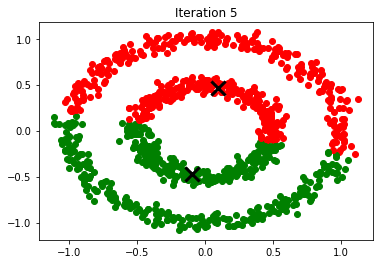

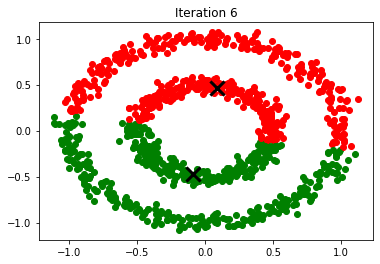

In [23]:
kmean_test_3 = KMeans(2, max_iterations = 6)
kmean_test_3.fit(X_test_3, visualize=True)

## Eg4:
**Not globular shape**

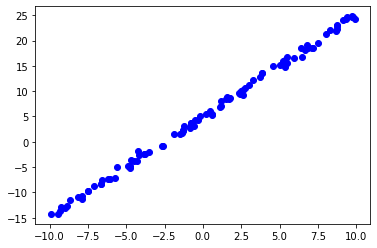

In [24]:
n_samples = 100
X1 = np.random.uniform(low=-10, high=10, size=(n_samples, 1))
X2 = 2 * X1 + 5 + np.random.normal(loc=0, scale=0.5, size=(n_samples, 1))
X_test_4 = np.array([X1, X2]).T.reshape(X.shape[0], 2)
plt.scatter(X_test_4[:, 0], X_test_4[:, 1], color='blue')
plt.show()

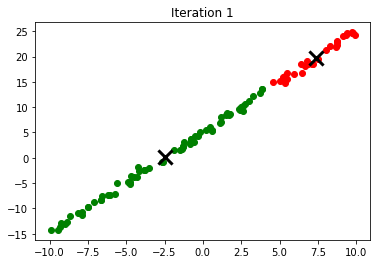

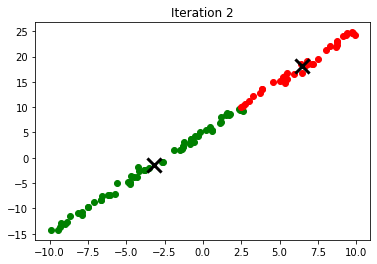

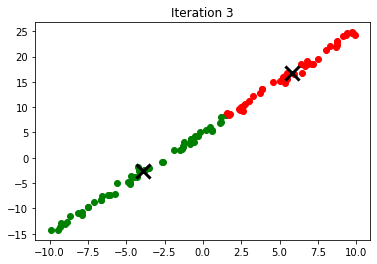

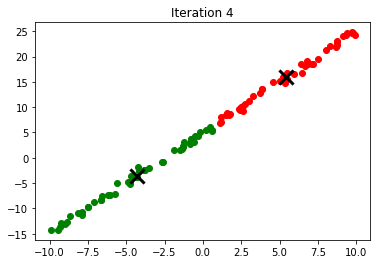

In [25]:
kmean_test_4 = KMeans(2, max_iterations = 10)
kmean_test_4.fit(X_test_4, visualize=True)

# Check with sklearn

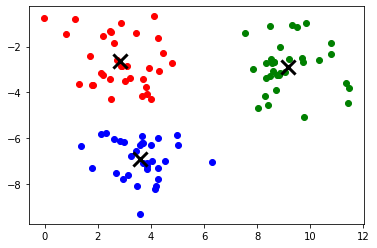

In [26]:
from sklearn.cluster import KMeans

# Khởi tạo KMeans
kmeans = KMeans(n_clusters=3)

# Fit dữ liệu vào KMeans
kmeans.fit(X)

# Trả về nhãn cho mỗi mẫu
labels = kmeans.labels_

# Trả về centroids
centroids = kmeans.cluster_centers_

# Visualization
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], color=colors[labels[i]])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='k')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


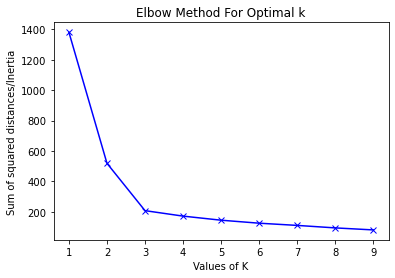

In [27]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)

        
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()